In [12]:
from mongodb_tools import get_collection, insert_or_overwrite_results, convert2normalized_ipc, convert2dict
from utils import *
import random
import pymongo

%matplotlib inline
plt.rc('font',family='Times New Roman') 
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

[('bimodal-D_JOLT-no-no-no-lru-1core', 1.0492978556003716),
 ('bimodal-tap-no-no-no-lru-1core', 1.0502731234273404),
 ('bimodal-mana-no-no-no-lru-1core', 1.1627709519623242),
 ('bimodal-pips-no-no-no-lru-1core', 1.1659501551432858),
 ('bimodal-jip-no-no-no-lru-1core', 1.1839402706348638),
 ('bimodal-barcelona-no-no-no-lru-1core', 1.184778812946853),
 ('bimodal-fnl_mma2-no-no-no-lru-1core', 1.1974824192011069),
 ('bimodal-EIP-no-no-no-lru-1core', 1.199060114762083)]

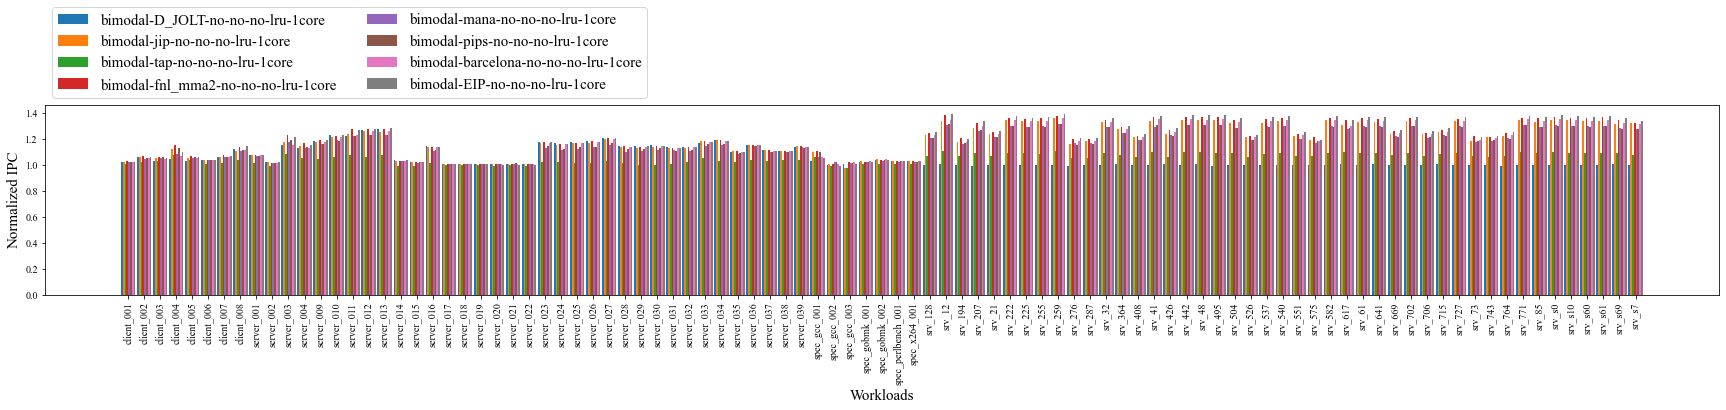

In [16]:
collection = get_collection()
data = {}
models = [
    "bimodal-no_instr-no-no-no-lru-1core",
    # "bimodal-no_instr-ip_stride-no-no-lru-1core",
    # "bimodal-no_instr-no-kpcp-no-lru-1core",
    # "bimodal-no_instr-no-spp_dev-no-lru-1core",
    "bimodal-D_JOLT-no-no-no-lru-1core",
    "bimodal-jip-no-no-no-lru-1core",
    "bimodal-tap-no-no-no-lru-1core",
    "bimodal-fnl_mma2-no-no-no-lru-1core",
    "bimodal-mana-no-no-no-lru-1core",
    "bimodal-pips-no-no-no-lru-1core",
    "bimodal-barcelona-no-no-no-lru-1core",
    "bimodal-EIP-no-no-no-lru-1core",
    # 'bimodal-no-pole_tiny-no-no-lru-1core',
]

for model in models:
    data[model] = collection.find_one({'model':clear_str(model)})
format_data1 = convert2dict(data, ipc1_list+iprefetch_list)
nipcs = get_nipc_by_env(format_data1)
draw_data_bars(nipcs, "Normalized IPC", 30, 3.5)
# draw_data_bars(nipcs, "Normalized IPC", 30, 3.5, index_by='bimodal-no-no-no-explorer-lru-1core')
dfs = convert2df(nipcs)
gmean_ipcs = [(d,gmean(dfs[d])[0]) for d in dfs]
gmean_ipcs.sort(key=lambda x: x[1])
gmean_ipcs

[('bimodal-no-dspatch-no-no-lru-1core', 1.1693635812083691),
 ('bimodal-no-pythia-no-no-lru-1core', 1.5268813504220762),
 ('bimodal-no-spp+ppf-no-no-lru-1core', 1.551358802269864),
 ('bimodal-no-bingo_dpc3_16K-no-no-lru-1core', 1.6092433877441963),
 ('bimodal-no-pole_tiny-OFFSET_MAX_CONF-32-no-no-lru-1core',
  1.6518806343364012)]

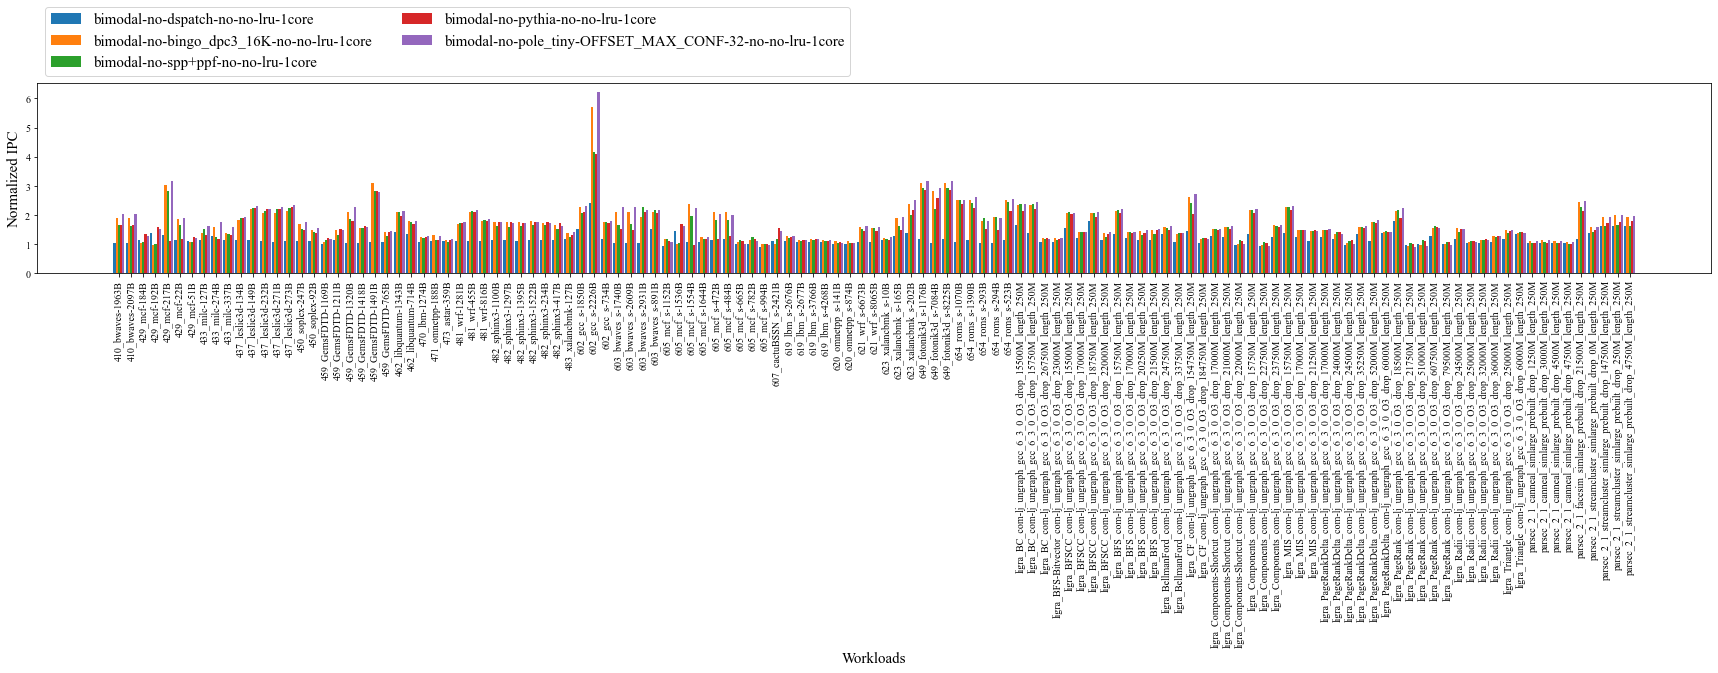

In [2]:
collection = get_collection()
data = {}
models = [
    "bimodal-no-no-no-no-lru-1core",
    "bimodal-no-dspatch-no-no-lru-1core",
    'bimodal-no-bingo_dpc3_16K-no-no-lru-1core',
    "bimodal-no-spp+ppf-no-no-lru-1core",
    'bimodal-no-pythia-no-no-lru-1core',
    "bimodal-no-pole_tiny-OFFSET_MAX_CONF-32-no-no-lru-1core",
]

for model in models:
    data[model] = collection.find_one({'model':clear_str(model)})
format_data1 = convert2dict(data, mpki_gt5_list)
nipcs = get_nipc_by_env(format_data1)
draw_data_bars(nipcs, "Normalized IPC", 30, 3.5)
# draw_data_bars(nipcs, "Normalized IPC", 30, 3.5, index_by='bimodal-no-no-no-explorer-lru-1core')
dfs = convert2df(nipcs)
gmean_ipcs = [(d,gmean(dfs[d])[0]) for d in dfs]
gmean_ipcs.sort(key=lambda x: x[1])
gmean_ipcs

In [83]:
bandwidth = get_bandwidth_increment(format_data1)
b = get_mean_df(bandwidth)
pd.DataFrame(b).T

,Bandwidth Increment
bimodal-no-dspatch-no-no-lru-1core,1.597513
bimodal-no-pole_tiny-OFFSET_MAX_CONF-32-no-no-lru-1core,1.995991
bimodal-no-bingo_dpc3_16K-no-no-lru-1core,1.642430
bimodal-no-spp+ppf-no-no-lru-1core,1.289573
bimodal-no-pythia-no-no-lru-1core,1.391313


In [8]:
dfs = convert2df(format_data1)
for t in dfs:
    for l in ['L1D', 'L2C', 'LLC']:
        print(t, l, dfs[t][f"{l} PREFETCH USEFUL"].mean())

bimodal-no-no-no-no-lru-1core L1D 0.0
bimodal-no-no-no-no-lru-1core L2C 0.0
bimodal-no-no-no-no-lru-1core LLC 0.0
bimodal-no-dspatch-no-no-lru-1core L1D 1243889.952
bimodal-no-dspatch-no-no-lru-1core L2C 347617.024
bimodal-no-dspatch-no-no-lru-1core LLC 196371.64
bimodal-no-bingo_dpc3_16K-no-no-lru-1core L1D 2794226.192
bimodal-no-bingo_dpc3_16K-no-no-lru-1core L2C 559596.448
bimodal-no-bingo_dpc3_16K-no-no-lru-1core LLC 174727.592
bimodal-no-spp+ppf-no-no-lru-1core L1D 2803598.352
bimodal-no-spp+ppf-no-no-lru-1core L2C 127742.864
bimodal-no-spp+ppf-no-no-lru-1core LLC 66178.672
bimodal-no-pythia-no-no-lru-1core L1D 2655422.976
bimodal-no-pythia-no-no-lru-1core L2C 360759.288
bimodal-no-pythia-no-no-lru-1core LLC 149903.416
bimodal-no-pole_tiny-OFFSET_MAX_CONF-32-no-no-lru-1core L1D 2293524.704
bimodal-no-pole_tiny-OFFSET_MAX_CONF-32-no-no-lru-1core L2C 1284824.312
bimodal-no-pole_tiny-OFFSET_MAX_CONF-32-no-no-lru-1core LLC 244527.024


In [3]:
dfs = convert2df(format_data1)
for t in dfs:
    for l in ['L1D', 'L2C', 'LLC']:
        print(t, l, dfs[t][f"{l} PREFETCH ISSUED"].mean())

bimodal-no-no-no-no-lru-1core L1D 0.0
bimodal-no-no-no-no-lru-1core L2C 0.0
bimodal-no-no-no-no-lru-1core LLC 0.0
bimodal-no-dspatch-no-no-lru-1core L1D 7661007.952
bimodal-no-dspatch-no-no-lru-1core L2C 0.0
bimodal-no-dspatch-no-no-lru-1core LLC 0.0
bimodal-no-bingo_dpc3_16K-no-no-lru-1core L1D 9237549.2
bimodal-no-bingo_dpc3_16K-no-no-lru-1core L2C 0.0
bimodal-no-bingo_dpc3_16K-no-no-lru-1core LLC 0.0
bimodal-no-spp+ppf-no-no-lru-1core L1D 9132723.776
bimodal-no-spp+ppf-no-no-lru-1core L2C 0.0
bimodal-no-spp+ppf-no-no-lru-1core LLC 0.0
bimodal-no-pythia-no-no-lru-1core L1D 18704952.488
bimodal-no-pythia-no-no-lru-1core L2C 0.0
bimodal-no-pythia-no-no-lru-1core LLC 0.0
bimodal-no-pole_tiny-OFFSET_MAX_CONF-32-no-no-lru-1core L1D 14599197.544
bimodal-no-pole_tiny-OFFSET_MAX_CONF-32-no-no-lru-1core L2C 0.0
bimodal-no-pole_tiny-OFFSET_MAX_CONF-32-no-no-lru-1core LLC 0.0


In [4]:
18704952.488/14599197.544

1.2812315493112423

In [107]:
dfs = convert2df(nipcs)
for df in dfs:
    dfs[df].to_excel(df+'.xlsx')

In [92]:
coverage = get_coverage(format_data1)
c = get_mean_df(coverage)
a = get_mean_df(get_accuracy(format_data1, 2))
df = pd.concat([c, a]).T
df

,L1D Coverage,L2C Coverage,LLC Coverage,L1D Accuracy,L2C Accuracy,LLC Accuracy
bimodal-no-dspatch-no-no-lru-1core,0.208995,0.267220,0.311600,0.515375,0.069687,0.039439
bimodal-no-pole_tiny-OFFSET_MAX_CONF-32-no-no-lru-1core,0.462111,0.693700,0.769517,0.787330,0.151963,0.027365
bimodal-no-bingo_dpc3_16K-no-no-lru-1core,0.537949,0.680095,0.726395,0.846388,0.091089,0.029685
bimodal-no-no-no-bingo_dpc3_16K-lru-1core,0.005689,0.000334,0.711088,0.000000,0.000000,0.740997
bimodal-no-no-no-bingo-lru-1core,0.005656,0.000333,0.646972,0.000000,0.000000,0.775221
bimodal-no-spp+ppf-no-no-lru-1core,0.518124,0.681649,0.719785,0.706818,0.037776,0.023213
bimodal-no-pythia-no-no-lru-1core,0.512288,0.662391,0.715327,0.609529,0.044220,0.029836
bimodal-no-pole_tiny_pc_offset_index_opt5-no-no-lru-1core,0.506083,0.679338,0.730327,0.810475,0.125084,0.023930
bimodal-no-pole_tiny_SDM_opt5-no-no-lru-1core,0.009381,0.077224,0.119569,0.429134,0.466497,0.061230
bimodal-no-pole_tiny_AVM_opt5-no-no-lru-1core,0.009021,0.653788,0.744139,0.000000,0.687145,0.031769


In [69]:
overprediction = get_overprediction(format_data1)
b = get_mean_df(overprediction)
pd.DataFrame(b).T

,L1D Overprediction Rate,L2C Overprediction Rate,LLC Overprediction Rate
bimodal-no-dspatch-no-no-lru-1core,0.747454,1.056783,0.914511
bimodal-no-pole_tiny-OFFSET_MAX_CONF-32-no-no-lru-1core,0.076095,1.752379,1.711688
bimodal-no-bingo_dpc3_16K-no-no-lru-1core,0.075105,1.241918,1.276472
bimodal-no-spp+ppf-no-no-lru-1core,0.269851,1.077724,1.110227
bimodal-no-pythia-no-no-lru-1core,0.492133,1.168275,1.158827
bimodal-no-pole_tiny-no-no-lru-1core,0.075936,1.750763,1.710771


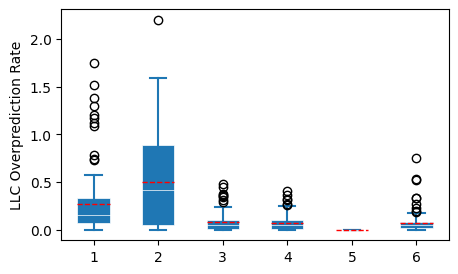

In [10]:
plt.style.use('default')
fig, ax = plt.subplots()
ax.boxplot([
       [overprediction[k][trace]['L1D Overprediction Rate'] for trace in overprediction[k]] for k in overprediction
    ], positions=[1, 2, 3, 4, 5, 6], patch_artist=True,
    showmeans=True, showfliers=True,
    meanline=True,
    meanprops={"color": 'red'},
    medianprops={"color": "white", "linewidth": 0.5},
    boxprops={"facecolor": "C0", "edgecolor": "white",
              "linewidth": 0.5},
    whiskerprops={"color": "C0", "linewidth": 1.5},
    capprops={"color": "C0", "linewidth": 1.5})

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))
# ax.set_xticklabels(['SMS', 'SPP+PPF', 'Bingo', 'Pythia', 'MVP'])
ax.set_ylabel('LLC Overprediction Rate')
fig.set_size_inches(5,3)
plt.show()

In [16]:
bandwidth = get_bandwidth_increment_by_env(format_data1)
b = get_mean_df(bandwidth)
pd.DataFrame(b).T

,Bandwidth Increment
bimodal-no-dspatch-no-no-lru-1core,1.597513
bimodal-no-pole_tiny-OFFSET_MAX_CONF-32-no-no-lru-1core,1.995991
bimodal-no-bingo_dpc3_16K-no-no-lru-1core,1.642430
bimodal-no-no-no-bingo_dpc3_16K-lru-1core,1.727081
bimodal-no-spp+ppf-no-no-lru-1core,1.289573
bimodal-no-pythia-no-no-lru-1core,1.391313
bimodal-no-pole_tiny_single_pht_opt5-no-no-lru-1core,1.671767
bimodal-no-pole_tiny_single_ppht-no-no-lru-1core,1.563302


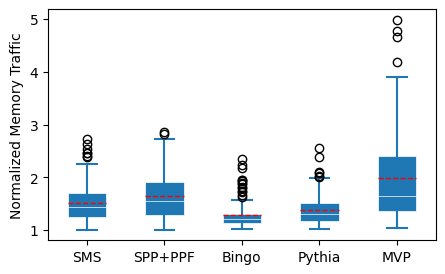

In [23]:
plt.style.use('default')
fig, ax = plt.subplots()
ax.boxplot([
       [bandwidth[k][trace]['Bandwidth Increment'] for trace in bandwidth[k]] for k in bandwidth
    ], positions=[1, 2, 3, 4, 5], patch_artist=True,
    showmeans=True, showfliers=True,
    meanline=True,
    meanprops={"color": 'red'},
    medianprops={"color": "white", "linewidth": 0.5},
    boxprops={"facecolor": "C0", "edgecolor": "white",
              "linewidth": 0.5},
    whiskerprops={"color": "C0", "linewidth": 1.5},
    capprops={"color": "C0", "linewidth": 1.5})

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))
ax.set_xticklabels(['SMS', 'SPP+PPF', 'Bingo', 'Pythia', 'MVP'])
ax.set_ylabel('Normalized Memory Traffic')
fig.set_size_inches(5,3)
plt.show()

In [21]:
dfs = convert2df(nipcs)
for df in dfs:
    dfs[df].to_excel(df+'.xlsx')

In [41]:
trace_dict = {clear_str(i):i for i in mpki_gt5_list}

mpki = get_miss_per_kiloinstr(format_data1)['bimodal-no-no-no-no-lru-1core']

df = pd.DataFrame(mpki).T
type1 = df.loc[df['LLC MPKI'] < 10].index.tolist()
type2 = df.loc[(10 <= df['LLC MPKI']) & (df['LLC MPKI']  < 20)].index.tolist()
type3 = df.loc[(20 <= df['LLC MPKI'])].index.tolist()
core = 4
batch = 10
mix = []
for t in [type1, type2, type3]:
    mix += [[trace_dict[random.choice(t)] for _ in range(core)] for _ in range(batch)]
mix

In [4]:
trace_dict = {clear_str(i):i for i in mpki_gt5_list}

mpki = get_miss_per_kiloinstr(format_data1)['bimodal-no-no-no-no-lru-1core']

df = pd.DataFrame(mpki).T
type1 = df.loc[df['LLC MPKI'] < 10].index.tolist()
type2 = df.loc[(10 <= df['LLC MPKI']) & (df['LLC MPKI']  < 20)].index.tolist()
type3 = df.loc[(20 <= df['LLC MPKI'])].index.tolist()
core = 4
batch = 10
mix = []
low_middle = [type1, type1, type2, type2]
low_high = [type1, type1, type3, type3]
middle_high = [type2, type2, type3, type3]

for bundle in [low_middle, low_high, middle_high]:
    mix += [[trace_dict[random.choice(t)] for t in bundle] for _ in range(batch)]
mix

[['ligra_BFSCC.com-lj.ungraph.gcc_6.3.0_O3.drop_15500M.length_250M.champsimtrace.xz',
  '649.fotonik3d_s-1176B.champsimtrace.xz',
  '654.roms_s-1070B.champsimtrace.xz',
  'ligra_PageRankDelta.com-lj.ungraph.gcc_6.3.0_O3.drop_24000M.length_250M.champsimtrace.xz'],
 ['ligra_PageRankDelta.com-lj.ungraph.gcc_6.3.0_O3.drop_17000M.length_250M.champsimtrace.xz',
  'ligra_BFS.com-lj.ungraph.gcc_6.3.0_O3.drop_17000M.length_250M.champsimtrace.xz',
  'ligra_BFS.com-lj.ungraph.gcc_6.3.0_O3.drop_15750M.length_250M.champsimtrace.xz',
  '603.bwaves_s-2609B.champsimtrace.xz'],
 ['ligra_MIS.com-lj.ungraph.gcc_6.3.0_O3.drop_17000M.length_250M.champsimtrace.xz',
  '459.GemsFDTD-1211B.champsimtrace.xz',
  'ligra_BC.com-lj.ungraph.gcc_6.3.0_O3.drop_15750M.length_250M.champsimtrace.xz',
  '619.lbm_s-4268B.champsimtrace.xz'],
 ['459.GemsFDTD-1418B.champsimtrace.xz',
  '621.wrf_s-8065B.champsimtrace.xz',
  'parsec_2.1.facesim.simlarge.prebuilt.drop_21500M.length_250M.champsimtrace.xz',
  '654.roms_s-523B.cham

[('bimodal-no-dspatch-LLC_SET-512-no-no-lru-1core', 1.1481427239228725),
 ('bimodal-no-dspatch-LLC_SET-1024-no-no-lru-1core', 1.156220288073338),
 ('bimodal-no-dspatch-LLC_SET-8192-no-no-lru-1core', 1.1568463688566901),
 ('bimodal-no-dspatch-LLC_SET-4096-no-no-lru-1core', 1.1601527762638206),
 ('bimodal-no-no-no-sms-LLC_SET-8192-lru-1core', 1.3222897807361713),
 ('bimodal-no-no-no-sms-LLC_SET-4096-lru-1core', 1.3514540365856464),
 ('bimodal-no-no-no-sms-LLC_SET-1024-lru-1core', 1.3685379023100062),
 ('bimodal-no-no-no-sms-LLC_SET-512-lru-1core', 1.3818942742781781),
 ('bimodal-no-pythia-LLC_SET-8192-no-no-lru-1core', 1.4847044028995526),
 ('bimodal-no-spp+ppf-LLC_SET-8192-no-no-lru-1core', 1.493972072095633),
 ('bimodal-no-pythia-LLC_SET-4096-no-no-lru-1core', 1.500604276053158),
 ('bimodal-no-pole_tiny-LLC_SET-32768-no-no-lru-1core', 1.504670035304686),
 ('bimodal-no-pythia-LLC_SET-512-no-no-lru-1core', 1.5070877372300053),
 ('bimodal-no-pythia-LLC_SET-1024-no-no-lru-1core', 1.5123673

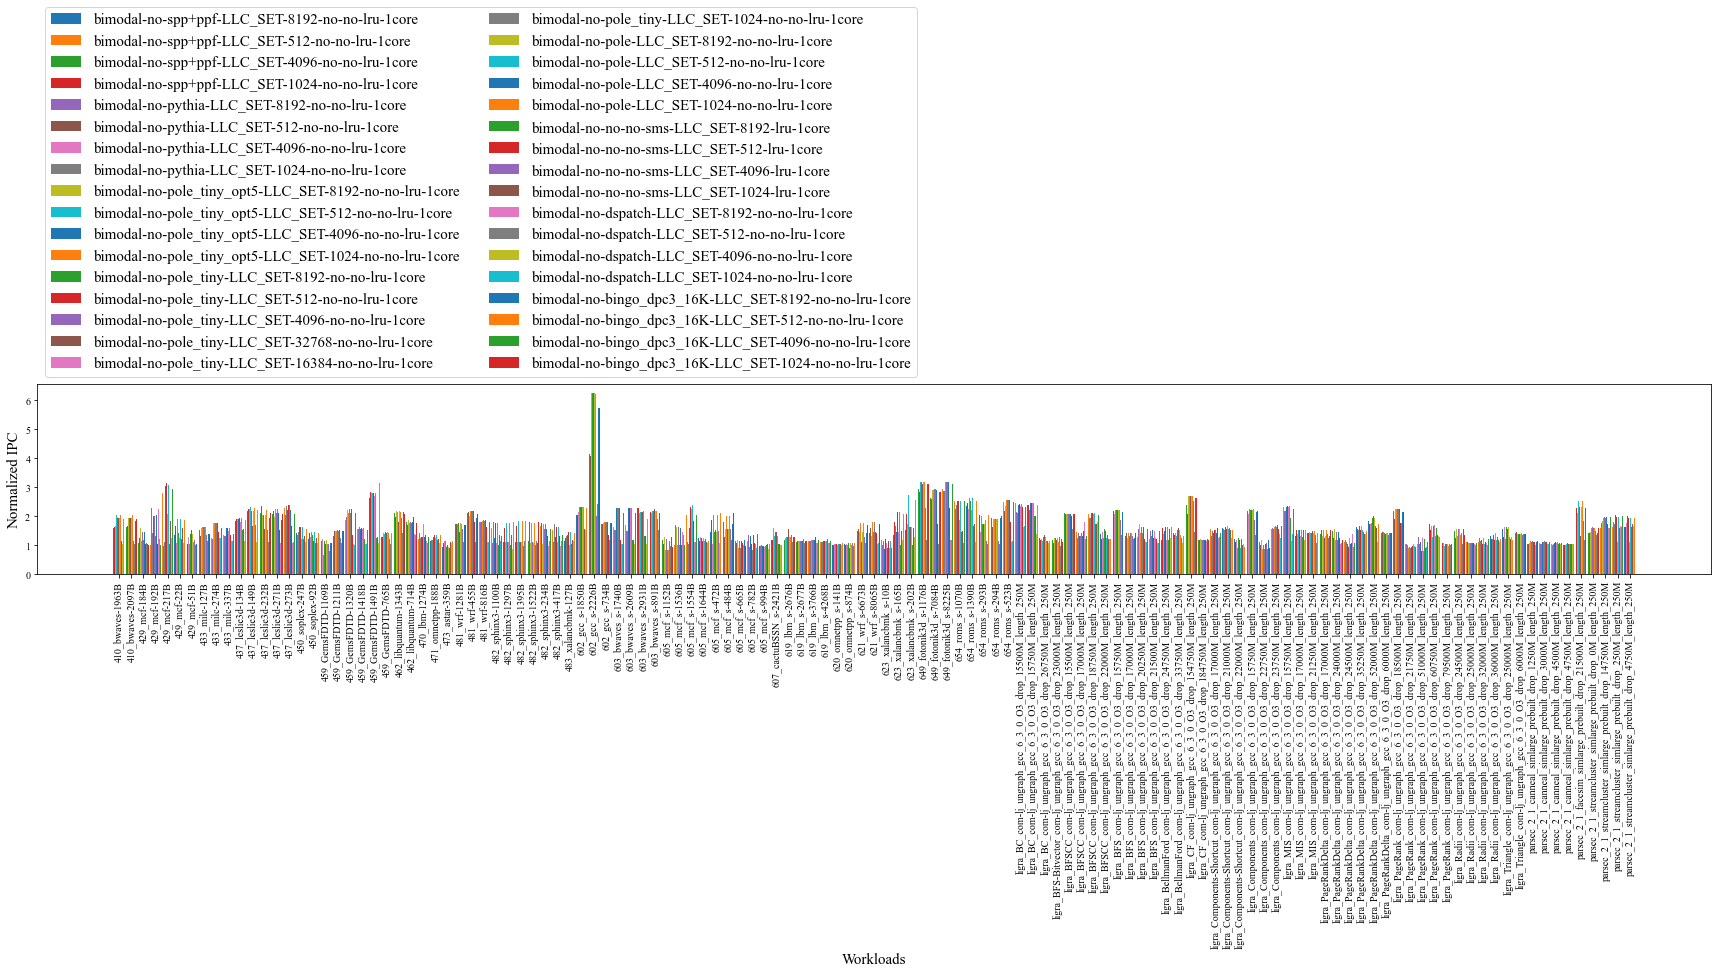

In [87]:
data = {}
collection = get_collection()
data['bimodal-no-no-no-no-lru-1core'] = collection.find_one({'model':clear_str('bimodal-no-no-no-no-lru-1core')})
for res in collection.find({'model':{'$regex':clear_str("-LLC_SET[a-zA-Z0-9\_\-]+1core")}}):
    data[res['model']] = res

format_data1 = convert2dict(data, mpki_gt5_list)
nipcs = get_nipc_by_env(format_data1, 1)
draw_data_bars(nipcs, "Normalized IPC", 30, 3.5)
# draw_data_bars(nipcs, "Normalized IPC", 30, 3.5, index_by='bimodal-no-no-no-explorer-lru-1core')
dfs = convert2df(nipcs)
gmean_ipcs = [(d,gmean(dfs[d])[0]) for d in dfs]
gmean_ipcs.sort(key=lambda x: x[1])
gmean_ipcs

In [21]:
1.592629390288047/1.542272193638691

1.032651302965236

In [62]:
df.to_excel("coverage_and_accuracy.xlsx")

In [110]:
for model in nipcs:
    for trace in nipcs[model]:
        nipcs[model][trace] = nipcs[model][trace]["Normalized IPC"]
df = pd.DataFrame(nipcs)

In [100]:
df['bimodal-no-spp+ppf-no-no-lru-1core'] = df['bimodal-no-explorer_double_pht1_1-START_CONF-2-no-no-lru-1core'] / df['bimodal-no-spp+ppf-no-no-lru-1core']
df['bimodal-no-bingo_dpc3_16K-no-no-lru-1core'] = df['bimodal-no-explorer_double_pht1_1-START_CONF-2-no-no-lru-1core'] / df['bimodal-no-bingo_dpc3_16K-no-no-lru-1core']
df['bimodal-no-sms-no-no-lru-1core'] = df['bimodal-no-explorer_double_pht1_1-START_CONF-2-no-no-lru-1core'] / df['bimodal-no-sms-no-no-lru-1core']
df.max()

In [117]:
a = gmean(df.loc[df.index.str.startswith('6')])
[a[-1]/i for i in a]

[1.2991542268415552, 1.0728926003943473, 1.0141890768099593, 1.0]

In [118]:
a = gmean(df.loc[df.index.str.startswith('4')])
[a[-1]/i for i in a]

[1.2650769079390023, 1.0896672913018934, 1.0404607481395876, 1.0]

In [119]:
a = gmean(df.loc[(~df.index.str.startswith('4')) & ~df.index.str.startswith('6')])
[a[-1]/i for i in a]

[1.0627265514328248, 1.0182015714541086, 1.0024035643341698, 1.0]

In [52]:
dfs = convert2df(format_data1)
for t in dfs:
    for l in ['L1D', 'L2C', 'LLC']:
        print(t, l, dfs[t][f"{l} PREFETCH ISSUED"].mean())

bimodal-no-no-no-no-lru-1core L1D 0.0
bimodal-no-no-no-no-lru-1core L2C 0.0
bimodal-no-no-no-no-lru-1core LLC 0.0
bimodal-no-ipcp_isca2020-no-no-lru-1core L1D 14769930.392
bimodal-no-ipcp_isca2020-no-no-lru-1core L2C 0.0
bimodal-no-ipcp_isca2020-no-no-lru-1core LLC 0.0
bimodal-no-ipcp_isca2020-ipcp_isca2020-next_line-lru-1core L1D 14420309.624
bimodal-no-ipcp_isca2020-ipcp_isca2020-next_line-lru-1core L2C 12718928.672
bimodal-no-ipcp_isca2020-ipcp_isca2020-next_line-lru-1core LLC 7535162.96
bimodal-no-ipcp_isca2020-ipcp_isca2020-no-lru-1core L1D 14674371.152
bimodal-no-ipcp_isca2020-ipcp_isca2020-no-lru-1core L2C 12663336.416
bimodal-no-ipcp_isca2020-ipcp_isca2020-no-lru-1core LLC 0.0
bimodal-no-no-no-sms-lru-1core L1D 0.0
bimodal-no-no-no-sms-lru-1core L2C 0.0
bimodal-no-no-no-sms-lru-1core LLC 7532110.488
bimodal-no-sms-no-no-lru-1core L1D 7558508.656
bimodal-no-sms-no-no-lru-1core L2C 0.0
bimodal-no-sms-no-no-lru-1core LLC 0.0
bimodal-no-bingo_dpc3_16K-no-no-lru-1core L1D 9237549.2


In [50]:
7336740.296/14547668.648

0.5043241273582794

In [34]:
dfs = convert2df(format_data1)
for t in dfs:
    # for l in ['L1D', 'L2C', 'LLC']:
    print(t, sum([dfs[t][f"{l} PREFETCH USEFUL"].sum() for l in ['L1D', 'L2C', 'LLC']]))

bimodal-no-no-no-no-lru-1core 0.0
bimodal-no-spp+ppf-LLC_SET-8192-no-no-lru-1core 394436108.0
bimodal-no-spp+ppf-LLC_SET-512-no-no-lru-1core 369044524.0
bimodal-no-spp+ppf-LLC_SET-4096-no-no-lru-1core 386579844.0
bimodal-no-spp+ppf-LLC_SET-1024-no-no-lru-1core 372409900.0
bimodal-no-pythia-LLC_SET-8192-no-no-lru-1core 405733170.0
bimodal-no-pythia-LLC_SET-512-no-no-lru-1core 380524543.0
bimodal-no-pythia-LLC_SET-4096-no-no-lru-1core 402298980.0
bimodal-no-pythia-LLC_SET-1024-no-no-lru-1core 390603593.0
bimodal-no-pole_tiny_opt5-LLC_SET-8192-no-no-lru-1core 491350371.0
bimodal-no-pole_tiny_opt5-LLC_SET-512-no-no-lru-1core 451245901.0
bimodal-no-pole_tiny_opt5-LLC_SET-4096-no-no-lru-1core 487196345.0
bimodal-no-pole_tiny_opt5-LLC_SET-1024-no-no-lru-1core 465446755.0
bimodal-no-pole_tiny-LLC_SET-8192-no-no-lru-1core 491319353.0
bimodal-no-pole_tiny-LLC_SET-512-no-no-lru-1core 451313248.0
bimodal-no-pole_tiny-LLC_SET-4096-no-no-lru-1core 487035970.0
bimodal-no-pole_tiny-LLC_SET-32768-no-no

In [8]:
491350371.0/394436108.0

1.2457033244025417

In [90]:
dfs = convert2df(format_data1)
for t in dfs:
    for l in ['L1D', 'L2C', 'LLC']:
        print(t, l, dfs[t][f"{l} PREFETCH USELESS"].mean())

bimodal-no-no-no-no-lru-1core L1D 0.0
bimodal-no-no-no-no-lru-1core L2C 0.0
bimodal-no-no-no-no-lru-1core LLC 0.0
bimodal-no-bingo_dpc3_16K-no-no-lru-1core L1D 483590.464
bimodal-no-bingo_dpc3_16K-no-no-lru-1core L2C 6003539.416
bimodal-no-bingo_dpc3_16K-no-no-lru-1core LLC 5055981.112
bimodal-no-explorer_4Kpage_small_pcpht-AT_SIZE-32-FT_SIZE-64-no-no-lru-1core L1D 445818.768
bimodal-no-explorer_4Kpage_small_pcpht-AT_SIZE-32-FT_SIZE-64-no-no-lru-1core L2C 8016062.528
bimodal-no-explorer_4Kpage_small_pcpht-AT_SIZE-32-FT_SIZE-64-no-no-lru-1core LLC 6782000.2


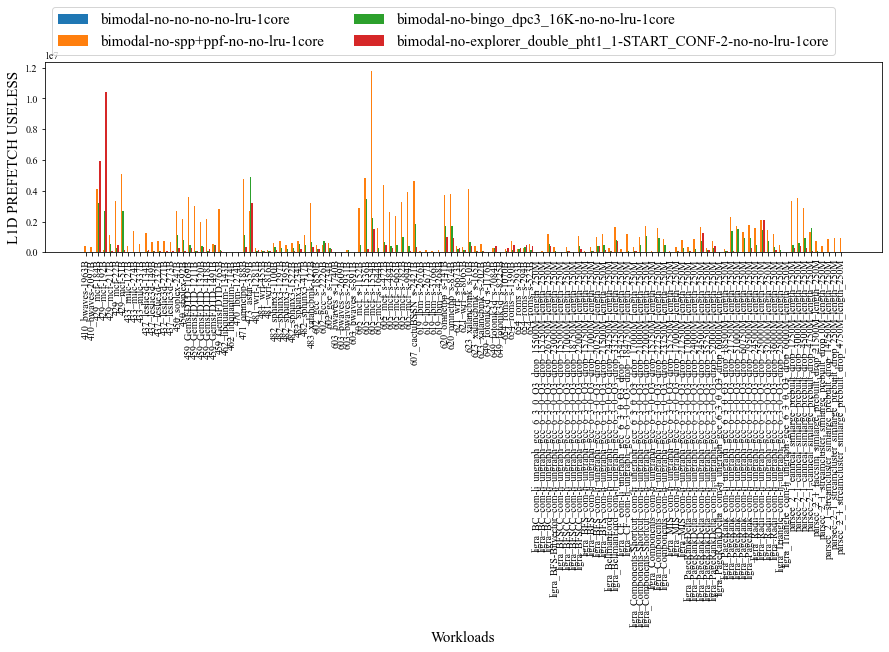

In [95]:
key = 'L1D PREFETCH USELESS'
draw_data_bars(format_data1, key, 15, 3.5)

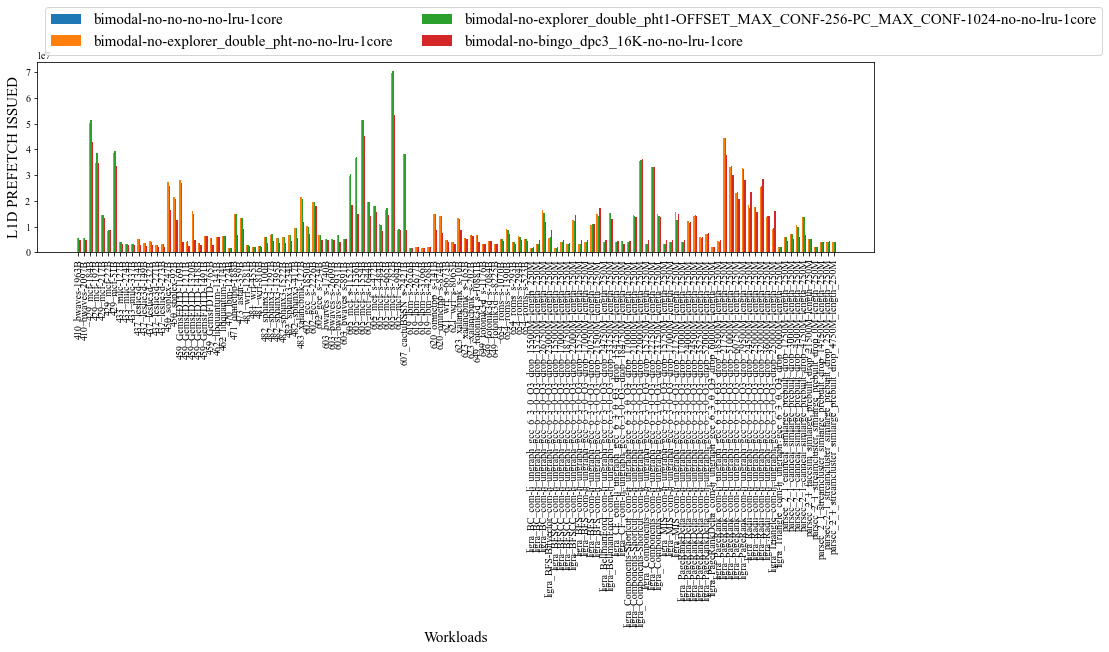

In [69]:
draw_data_bars(format_data1, "L1D PREFETCH ISSUED", 15, 3.5)

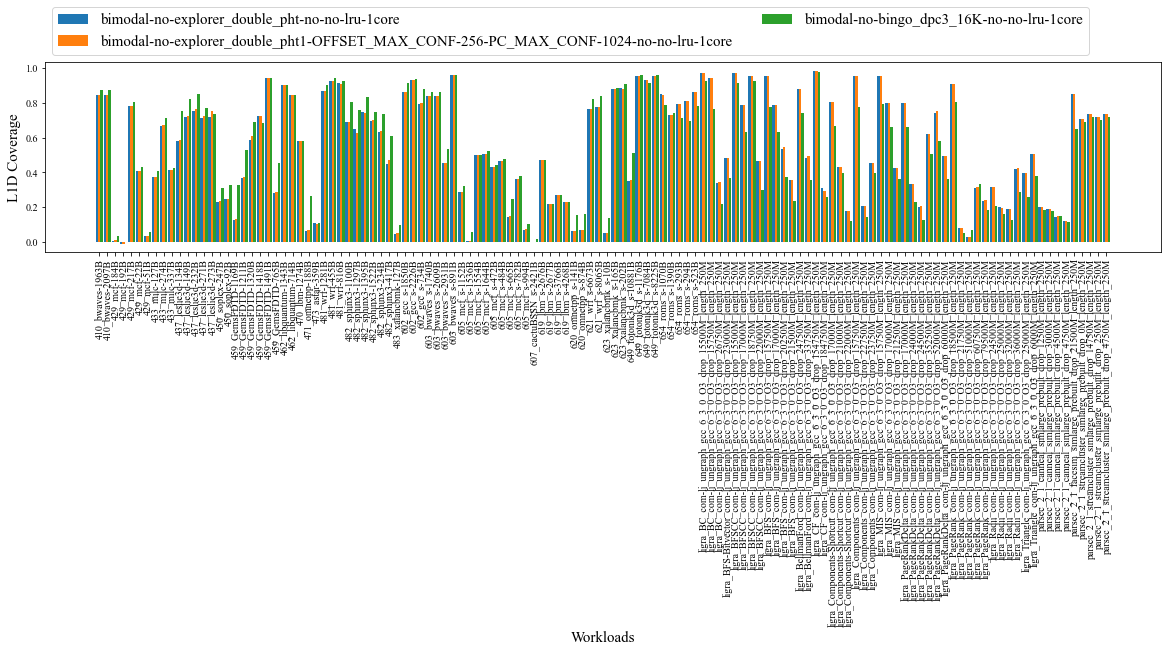

In [76]:
coverage = get_coverage(format_data1)
draw_data_bars(coverage, "L1D Coverage", 20, 3.5)

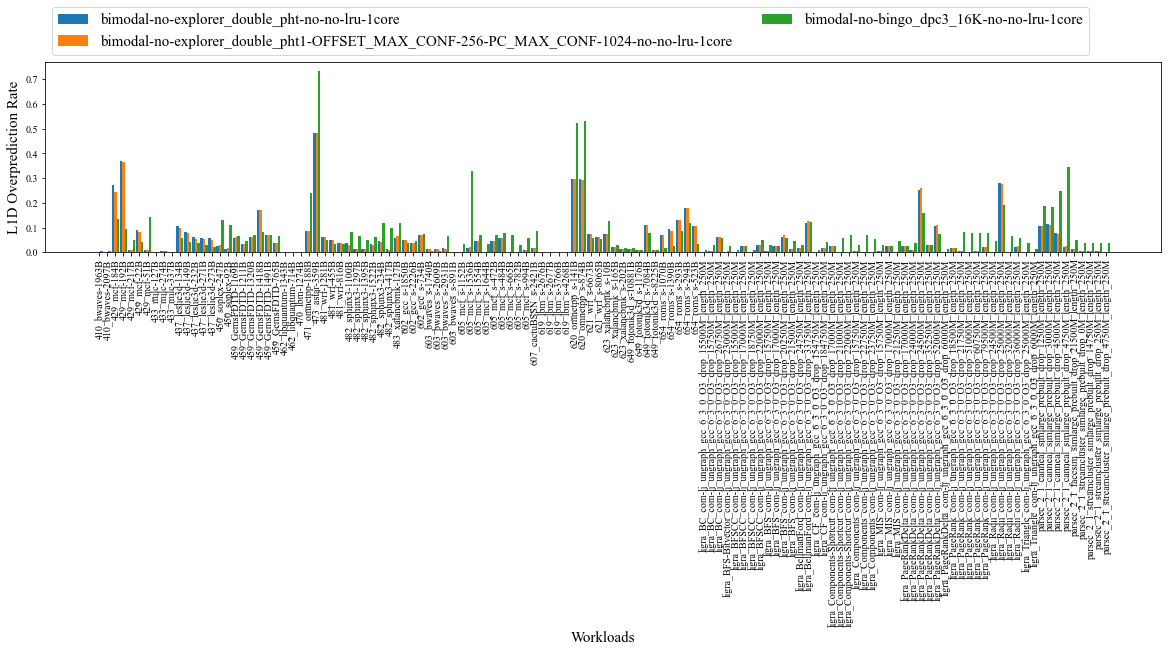

In [78]:
overprediction = get_overprediction(format_data1)
draw_data_bars(overprediction, "L1D Overprediction Rate", 20, 3.5)

In [10]:
# clear multi-core experiment resul
def clear_multi_core_results(collection, data):
    for model in data:
        data[model] = collection.find_one({'model':clear_str(model)})
        for one in data[model]['data']:
            if one['Trace Name'] in trace_mix1_4core:
                hash_key = hash(''.join(map(lambda x: x.replace('.champsimtrace.xz', ''), one['Trace Name'])))
                trace = f"mix-{hash_key}"
                old_trace = one['trace']
                one['trace'] = trace
                print(old_trace, trace)
                res = collection.update_one({'model':clear_str(model)}, {'$set': {'data.$[idx]': {
                                      **one}}}, upsert=True, array_filters=[{"idx.trace": old_trace}])
                print(res.modified_count)

[('bimodal-no-dspatch-no-no-lru-4core', 1.0726929893159594),
 ('bimodal-no-spp+ppf-no-no-lru-4core', 1.3958978811093763),
 ('bimodal-no-pythia-no-no-lru-4core', 1.401088304905678),
 ('bimodal-no-bingo_dpc3_16K-no-no-lru-4core', 1.4932353284485236),
 ('bimodal-no-pole_tiny_opt5-no-no-lru-4core', 1.497226196493682)]

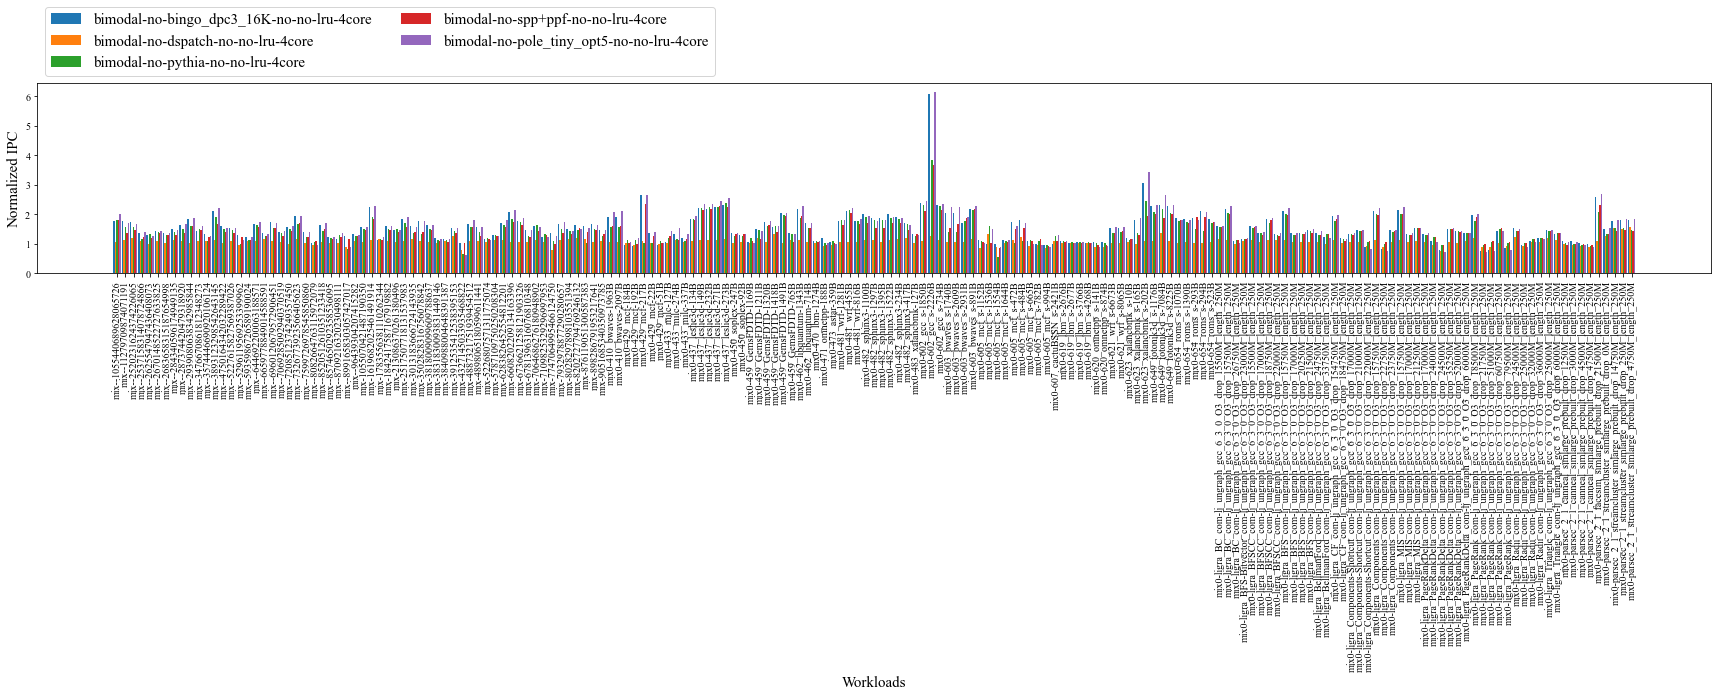

In [56]:
data = {}
collection = get_collection()
models = [
    "bimodal-no-no-no-no-lru-4core",
    # 'bimodal-no-explorer_double_pht1_1-no-no-lru-4core',
    # 'bimodal-no-explorer_double_pht1_1_m-no-no-lru-4core',
    "bimodal-no-bingo_dpc3_16K-no-no-lru-4core",
    # "bimodal-no-no-no-sms-lru-4core",
    # "bimodal-no-sms-no-no-lru-4core",
    "bimodal-no-dspatch-no-no-lru-4core",
    # "bimodal-no-no-pythia-no-lru-4core",
    "bimodal-no-pythia-no-no-lru-4core",
    "bimodal-no-spp+ppf-no-no-lru-4core",
    # "bimodal-no-ipcp_isca2020-ipcp_isca2020-next_line-lru-4core",
    "bimodal-no-pole_tiny_opt5-no-no-lru-4core"
]
for model in models:
    data[model] = collection.find_one({'model':clear_str(model)})

format_data1 = convert2dict(data, mpki_gt5_list_homo_4core+trace_mix1_4core+trace_mix2_4core)
nipcs = get_normalized_ipc(format_data1, 4, True)
draw_data_bars(nipcs, "Normalized IPC", 30, 3.5)
# draw_data_bars(nipcs, "Normalized IPC", 30, 3.5, index_by='bimodal-no-no-no-explorer-lru-1core')
dfs = convert2df(nipcs)
gmean_ipcs = [(d,gmean(dfs[d])[0]) for d in dfs]
gmean_ipcs.sort(key=lambda x: x[1])
gmean_ipcs

In [14]:
for key in nipcs['bimodal-no-pole_tiny-no-no-lru-4core']:
    if key not in nipcs['bimodal-no-pythia-no-no-lru-4core']:
        print(key)

mix--2520231624374226065


[('bimodal-no-explorer_4Kpage_small_pcpht-no-no-lru-8core',
  1.2381681359212986),
 ('bimodal-no-no-no-sms-lru-8core', 1.2586508013596904),
 ('bimodal-no-bingo_dpc3_16K-no-no-lru-8core', 1.2730214460625873),
 ('bimodal-no-no-pythia-no-lru-8core', 1.2770289659298049),
 ('bimodal-no-no-spp+ppf-no-lru-8core', 1.3100484397967862)]

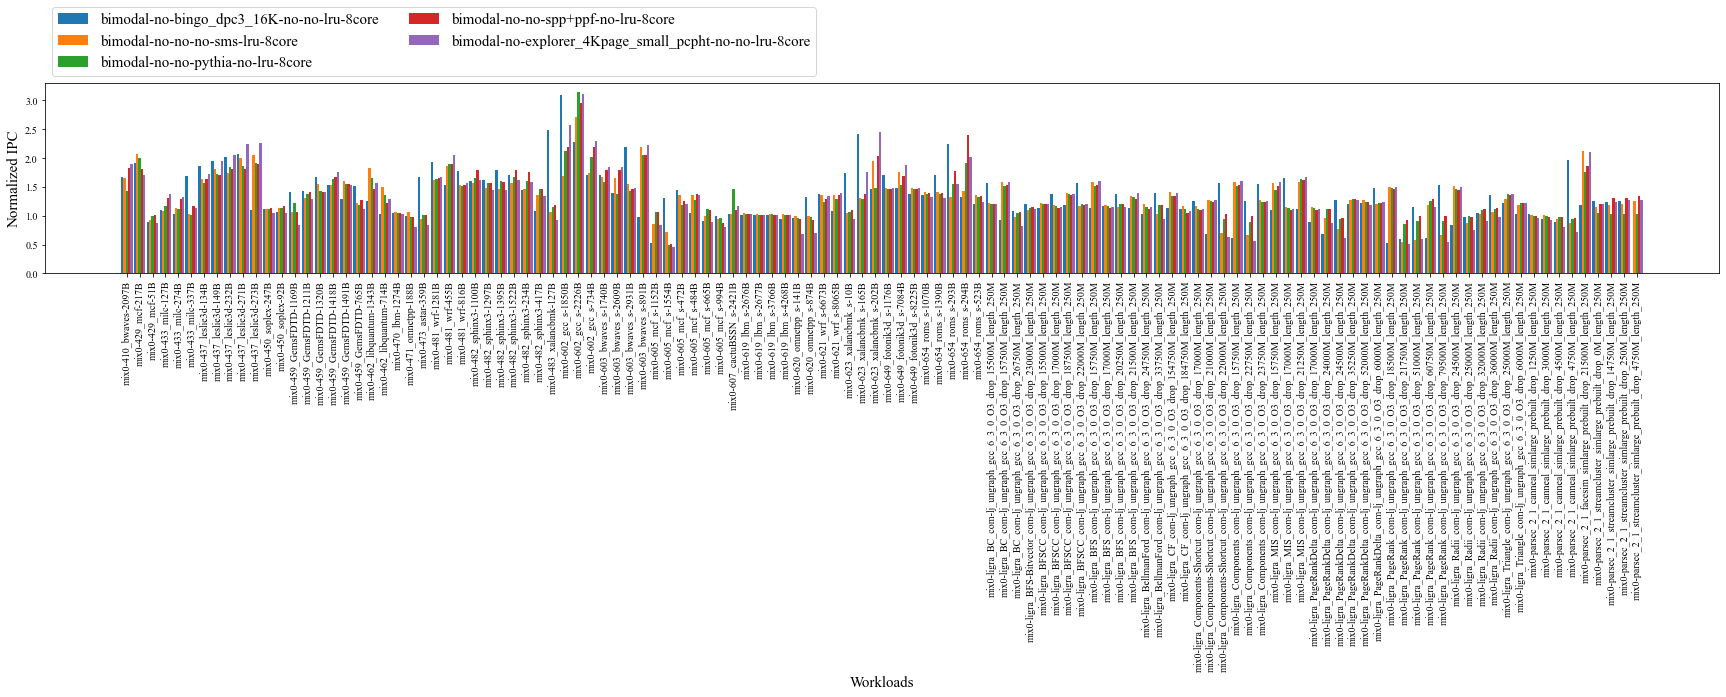

In [12]:
data = {}
collection = get_collection()
models = [
    "bimodal-no-no-no-no-lru-8core",
    # 'bimodal-no-explorer_double_pht1_1-no-no-lru-8core',
    "bimodal-no-bingo_dpc3_16K-no-no-lru-8core",
    # "bimodal-no-bingo_dpc3_1K-no-no-lru-8core",
    "bimodal-no-no-no-sms-lru-8core",
    # "bimodal-no-no-dspatch-no-lru-8core",
    # "bimodal-no-no-no-bingo_dpc3_16K-lru-8core",
    "bimodal-no-no-pythia-no-lru-8core",
    "bimodal-no-no-spp+ppf-no-lru-8core",
    "bimodal-no-explorer_4Kpage_small_pcpht-no-no-lru-8core",
]
for model in models:
    data[model] = collection.find_one({'model':clear_str(model)})

filtered_traces = list(filter(
    lambda x: not x[0].startswith("429.mcf-184") \
    and not x[0].startswith("605.mcf_s-1536") \
    and not x[0].startswith("605.mcf_s-782") \
    and not x[0].startswith("410.bwaves-1963")\
    and not x[0].startswith("429.mcf-192"),
    mpki_gt5_list_homo_8core
))
    
format_data1 = convert2dict(data, filtered_traces)
nipcs = get_normalized_ipc(format_data1, 8, False)
draw_data_bars(nipcs, "Normalized IPC", 30, 3.5)
# draw_data_bars(nipcs, "Normalized IPC", 30, 3.5, index_by='bimodal-no-no-no-explorer-lru-1core')
dfs = convert2df(nipcs)
gmean_ipcs = [(d,gmean(dfs[d])[0]) for d in dfs]
gmean_ipcs.sort(key=lambda x: x[1])
gmean_ipcs